# Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pylatex
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from random import uniform
from math import pow

In [2]:
df = pd.DataFrame({"f1":     [ 80,  90, 100, 110, 123, 132, 150, 151,  160,  174, 178, 200],
                   "target": [700, 750, 800, 850, 900, 880, 920, 950,  950,  960, 970, 990]})

In [3]:
X_train = np.array(df["f1"]).reshape(-1,1)
y_train = np.array(df["target"])

### Cost Function
$$h(x) = xw$$
<br>
$$cost(x) = \frac{1}{2N} \sum_{i=1}^{N} ({h(x^{(i)}) - y^{(i)}})^2$$

### Gradient Descent
Needs to choose a learning rate<br>
Needs many interations<br>
Works well even when m is large<br>
Repeat until convergence
<br>
α -> learning rate
$$w_{j} = w_{j} - α\frac{\partial cost(w)}{\partial w_{j}}$$
<br>
$$w_{j} = w_{j} - \frac{α}{N} \sum_{i=1}^{N} ({h(x^{(i)}) - y^{(i)}})x^{(i)}_{j}$$

### Sklearn

In [4]:
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(X_train)

In [5]:
clf = LinearRegression(fit_intercept=False)
clf.fit(poly_train, y_train)
y_test = clf.predict(poly_train)

In [6]:
w0, w1, w2 = clf.coef_

print(f"w0 = {w0}")
print(f"w1 = {w1}")
print(f"w2 = {w2}")

w0 = 207.7117602990599
w1 = 7.90968690583107
w2 = -0.0202786001818005


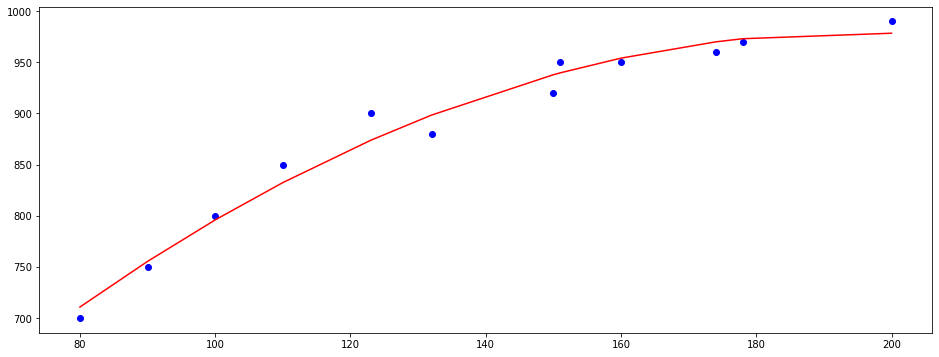

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(df["f1"], y_train, "bo", 
         df["f1"], y_test, "r")

## Scratch

In [8]:
def train():
    lr = 1e-9
    iterations = 4000000
    N = X_train.shape[0]

    w = np.array([uniform(0,1) for i in range(X_train.shape[1])]).reshape(-1,1)   
    y = y_train.reshape(-1, 1)
    
    for i in range(iterations):
        hx = np.dot(X_train, w)
        diff = hx - y
        res = np.dot(diff.T[0], X_train)
        gradient = np.divide(res, N)
        w -= lr * gradient.reshape(-1, 1)
    
    return w

In [9]:
df["f1_square"] = df["f1"].apply(lambda x: pow(x, 2))
X_train = np.array([[f1_s, f1, 1] for f1_s, f1 in df[["f1_square", "f1"]].values])
w = train()
y_test = X_train.dot(w).transpose()[0]

In [10]:
w0, w1, w2 = w

print(f"w0 = {w0}")
print(f"w1 = {w1}")
print(f"w2 = {w2}")

w0 = [-0.02922584]
w1 = [10.6963921]
w2 = [0.33780067]


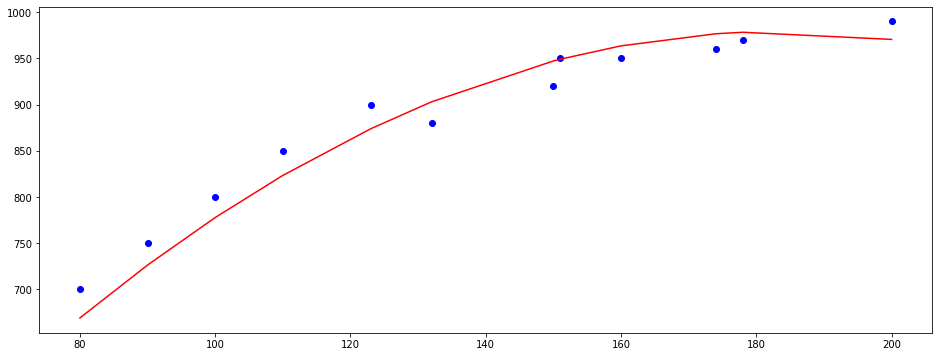

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(df["f1"], y_train, "bo", 
         df["f1"], y_test, "r")